# CH. 8 - Market Basket Analysis
## Exercises

#### Exercise 8.01: Simple Transaction Data

In [1]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

In [2]:
example = [
    ['milk', 'bread', 'apples', 'cereal', 'jelly', 'cookies', 'salad', 'tomatoes'],
    ['beer', 'milk', 'chips', 'salsa', 'grapes', 'wine', 'potatoes', 'eggs', 'carrots'],
    ['diapers', 'baby formula', 'milk', 'bread', 'chicken', 'asparagus', 'cookies'],
    ['milk', 'cookies', 'chicken', 'asparagus', 'broccoli', 'cereal', 'orange juice'],
    ['steak', 'asparagus', 'broccoli', 'chips', 'salsa', 'ketchup', 'potatoes', 'salad'],
    ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 'crackers', 'strawberries', 'cookies'],
    ['chocolate cake', 'strawberries', 'wine', 'cheese', 'beer', 'milk', 'orange juice'],
    ['chicken', 'peas', 'broccoli', 'milk', 'bread', 'eggs', 'potatoes', 'ketchup', 'crackers'],
    ['eggs', 'bread', 'cheese', 'turkey', 'salad', 'tomatoes', 'wine', 'steak', 'carrots'],
    ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 'turkey', 'chips', 'salsa', 'diapers']
]

In [3]:
print(example)

[['milk', 'bread', 'apples', 'cereal', 'jelly', 'cookies', 'salad', 'tomatoes'], ['beer', 'milk', 'chips', 'salsa', 'grapes', 'wine', 'potatoes', 'eggs', 'carrots'], ['diapers', 'baby formula', 'milk', 'bread', 'chicken', 'asparagus', 'cookies'], ['milk', 'cookies', 'chicken', 'asparagus', 'broccoli', 'cereal', 'orange juice'], ['steak', 'asparagus', 'broccoli', 'chips', 'salsa', 'ketchup', 'potatoes', 'salad'], ['beer', 'salsa', 'asparagus', 'wine', 'cheese', 'crackers', 'strawberries', 'cookies'], ['chocolate cake', 'strawberries', 'wine', 'cheese', 'beer', 'milk', 'orange juice'], ['chicken', 'peas', 'broccoli', 'milk', 'bread', 'eggs', 'potatoes', 'ketchup', 'crackers'], ['eggs', 'bread', 'cheese', 'turkey', 'salad', 'tomatoes', 'wine', 'steak', 'carrots'], ['bread', 'milk', 'tomatoes', 'cereal', 'chicken', 'turkey', 'chips', 'salsa', 'diapers']]


In [ ]:
# Exercise 8.01 Unit Test

def unittest_exercise_8_01(data):
    assert len(data) == 10, "List length wrong"
    assert sum([len(l) for l in data]) == 81, "Sublist length wrong"

unittest_exercise_8_01(data=example)

#### Exercise 8.02: Computing Metrics

In [6]:
# milk (x) and bread (y)
# bought milk => bought bread

N = len(example)
f_x = sum(['milk' in i for i in example]) # milk
f_y = sum(['bread' in i for i in example]) # bread
f_x_y = sum([
    all(w in i for w in ['milk', 'bread']) 
    for i in example
])

print(
    "N = {}\n".format(N) + 
    "Freq(x) = {}\n".format(f_x) + 
    "Freq(y) = {}\n".format(f_y) + 
    "Freq(x, y) = {}".format(f_x_y)
)

N = 10
Freq(x) = 7
Freq(y) = 5
Freq(x, y) = 4


In [7]:
# support (supp)

support = f_x_y / N
print("Support = {}".format(round(support, 4)))

Support = 0.4


In [8]:
# confidence: x -> y

confidence = support / (f_x / N)
print("Confidence = {}".format(round(confidence, 4)))

Confidence = 0.5714


In [9]:
# lift: x -> y

lift = confidence / (f_y / N)
print("Lift = {}".format(round(lift, 4)))

Lift = 1.1429


In [10]:
# leverage: x -> y

leverage = support - ((f_x / N) * (f_y / N))
print("Leverage = {}".format(round(leverage, 4)))

Leverage = 0.05


In [11]:
# conviction: x -> y

conviction = (1 - (f_y / N)) / (1 - confidence)
print("Conviction = {}".format(round(conviction, 4)))

Conviction = 1.1667


In [ ]:
# Exercise 8.02 Unit Test

def unittest_exercise_8_02(pred_dict):
    pred_dict_order = OrderedDict(pred_dict.items())
    
    actual_dict = {
        "Support":0.4, "Confidence":0.5714, 
        "Lift":1.1429, "Leverage":0.05, 
        "Conviction":1.1667
    }
    actual_dict_order = OrderedDict(actual_dict.items())
    
    assert pred_dict_order == actual_dict_order, "Wrong metric values"

pred_dict = {
    "Support":round(support,4), "Confidence":round(confidence,4), 
    "Lift":round(lift,4), "Leverage":round(leverage,4), 
    "Conviction":round(conviction,4)
}
unittest_exercise_8_02(pred_dict=pred_dict)

#### Exercise 8.03: Data Loading

In [22]:
online = pandas.read_excel(
    io="~/Desktop/Online Retail.xlsx", 
    sheet_name="Online Retail", 
    header=0
)

In [23]:
online.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [24]:
online.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
print("Data dimension (row count, col count): {dim}".format(dim=online.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online.InvoiceNo.nunique()))
print("Count of unique customer ids: {cnt}".format(cnt=online.CustomerID.nunique()))

Data dimension (row count, col count): (541909, 8)
Count of unique invoice numbers: 25900
Count of unique customer ids: 4372


In [ ]:
# Exercise 8.03 Unit Test

def unittest_exercise_8_03(df):
    df_shape = df.shape
    invoice_nunique = df.InvoiceNo.nunique()
    customer_nunique = df.CustomerID.nunique()
    assert df_shape == (541909, 8), "Dimension wrong"
    assert invoice_nunique == 25900, "N-unique invoice no wrong"
    assert customer_nunique == 4372, "N-unique customer wrong"

unittest_exercise_8_03(df=online)

#### Exercise 8.04: Data Cleaning and Formatting

In [27]:
# create new column
# indicator of whether InvoiceNo starts with C
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

In [28]:
online1 = (
    online
    # filter out non-positive quantity values
    .loc[online["Quantity"] > 0]
    # remove InvoiceNos starting with C
    .loc[online['IsCPresent'] != 1]
    # column filtering
    .loc[:, ["InvoiceNo", "Description"]]
    # dropping all rows with at least one missing value
    .dropna()
)

In [29]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [30]:
print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (530693, 2)
Count of unique invoice numbers: 20136


In [31]:
# extract unique invoice numbers as list
invoice_no_list = online1.InvoiceNo.tolist()
invoice_no_list = list(set(invoice_no_list))
print("Length of list of invoice numbers: {ln}".format(ln=len(invoice_no_list)))

Length of list of invoice numbers: 20136


In [32]:
# take subset of invoice number for exercises
subset_invoice_no_list = invoice_no_list[0:5000]
print("Length of subset list of invoice numbers: {ln}".format(ln=len(subset_invoice_no_list)))

Length of subset list of invoice numbers: 5000


In [33]:
# filter data set down to based on
# subset of invoice number list
online1 = online1.loc[online1["InvoiceNo"].isin(subset_invoice_no_list)]

In [34]:
online1.head(10)

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


In [35]:
## DIFFERENT: ORIGINAL 133315

print("Data dimension (row count, col count): {dim}".format(dim=online1.shape))
print("Count of unique invoice numbers: {cnt}".format(cnt=online1.InvoiceNo.nunique()))

Data dimension (row count, col count): (133313, 2)
Count of unique invoice numbers: 5000


In [36]:
## DIFFERENT: EDITOR DELETE CORRECT VERSION

# turn the data in a list of lists
# each sublist contains the items belonging
# to each unique invoice number

# initiate the outer list of the list of lists
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    # filter data set down to one invoice number
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    # extract item descriptions and convert to list
    tmp_items = tmp_df.Description.tolist()
    # append list invoice_item_list
    invoice_item_list.append(tmp_items)
    
print(invoice_item_list[1:5])

[['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND'], ['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION'], ['BATH BUILDING BLOCK WORD']]


In [ ]:
# Exercise 8.04 Unit Test

def unittest_exercise_8_04(data):
    assert len(data) == 5000, "List length wrong"
    assert sum([len(l) for l in data]) == 133313, "Sublist length wrong"

unittest_exercise_8_04(data=invoice_item_list)

#### Exercise 8.05: Data Encoding

In [39]:
# do not run
# this is included as an example

def manual_encoding(ll):
    # unlist the list of lists input
    # result is one list with all the elements of the sublists
    list_dup_unsort_items = [element for sub in ll for element in sub]
    # two cleaning steps:
    #     1. remove duplicate items, only want one of each item in list
    #     2. sort items in alphabetical order
    list_nondup_sort_items = sorted(list(set(list_dup_unsort_items)))
    
    # initialize data frame with all elements having False value
    # name the columns the elements of list_dup_unsort_items
    manual_df = pandas.DataFrame(False, index=range(len(ll)), columns=list_dup_unsort_items)
    
    # change False to True if element is in individual transaction list
    # each row is represents the contains of an individual transaction
    # (sublist from the original list of lists)
    for i in range(len(ll)):
        for j in ll[i]:
            manual_df.loc[i, j] = True
    
    # return the True/False data frame
    return manual_df

In [40]:
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)
print(online_encoder_array)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [41]:
## DIFFERENT: EDITOR DELETED CORRECT VERSION

online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

# this is a very big table, so for more 
# easy viewing only a subset is printed
online_encoder_df.loc[
    4970:4979, 
    online_encoder_df.columns.tolist()[0:8]
]

,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS
4970,False,False,False,False,False,False,False,False
4971,False,False,False,False,False,False,False,False
4972,False,False,False,False,False,False,False,False
4973,False,False,False,False,False,False,False,False
4974,False,False,True,False,False,False,False,False
4975,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False


In [42]:
## DIFFERENT: ORIGINAL COL COUNT 3135

print("Data dimension (row count, col count): {dim}".format(dim=online_encoder_df.shape))

Data dimension (row count, col count): (5000, 3136)


In [ ]:
# Exercise 8.05 Unit Test

def unittest_exercise_8_05(df):
    df_shape = df.shape
    assert df_shape == (5000, 3136), "Dimension mismatch"
    
    unique_vals = list(set(df.nunique().values.tolist()))[0]
    assert unique_vals == 2, "Too many unique values"

unittest_exercise_8_05(df=online_encoder_df)

#### Exercise 8.06: Apriori Algorithm

In [45]:
# default minimum support = 0.5
# does not use colnames (item names)

mod = mlxtend.frequent_patterns.apriori(online_encoder_df)
mod

,support,itemsets


In [46]:
mod_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df,
    min_support=0.01
)
mod_minsupport.loc[0:6]

,support,itemsets
0,0.0110,(1)
1,0.0340,(2)
2,0.0178,(6)
3,0.0126,(10)
4,0.0132,(11)
5,0.0178,(12)
6,0.0276,(13)


In [47]:
# add colnames for easier interpretability

mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.0110,( OVAL WALL MIRROR DIAMANTE )
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON )
2,0.0178,(10 COLOUR SPACEBOY PEN)
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES)
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND)
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT)


In [48]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

mod_colnames_minsupport.loc[0:6]

,support,itemsets,length
0,0.0110,( OVAL WALL MIRROR DIAMANTE ),1
1,0.0340,( SET 2 TEA TOWELS I LOVE LONDON ),1
2,0.0178,(10 COLOUR SPACEBOY PEN),1
3,0.0126,(12 IVORY ROSE PEG PLACE SETTINGS),1
4,0.0132,(12 MESSAGE CARDS WITH ENVELOPES),1
5,0.0178,(12 PENCIL SMALL TUBE WOODLAND),1
6,0.0276,(12 PENCILS SMALL TUBE RED RETROSPOT),1


In [49]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'ANTIQUE SILVER TEA GLASS ETCHED', 'REGENCY CAKESTAND 3 TIER'}
    )
]

,support,itemsets,length
1000,0.012,"(ANTIQUE SILVER TEA GLASS ETCHED, REGENCY CAKE...",2


In [50]:
## ORDER OF ITEMSETS DIFFERS

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
889,0.0200,"(6 RIBBONS RUSTIC CHARM, REGENCY CAKESTAND 3 T...",2
950,0.0208,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
1309,0.0200,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT)",2
1516,0.0208,"(HANGING HEART ZINC T-LIGHT HOLDER, SINGLE HEA...",2
1565,0.0206,"(HEART OF WICKER SMALL, JUMBO BAG RED RETROSPOT)",2
1640,0.0204,"(HOME BUILDING BLOCK WORD, WHITE HANGING HEART...",2
1753,0.0206,"(REGENCY CAKESTAND 3 TIER, JAM MAKING SET WITH...",2
1792,0.0206,"(JUMBO BAG OWLS, JUMBO BAG PINK POLKADOT)",2
1879,0.0208,"(JUMBO BAG RED RETROSPOT, RED RETROSPOT CHARLO...",2
1944,0.0204,"(JUMBO STORAGE BAG SUKI, JUMBO BAG WOODLAND AN...",2


Text(0.5, 1.0, 'Support')

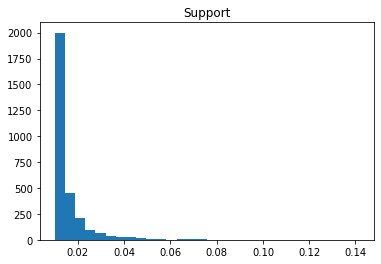

In [51]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.title("Support")

In [ ]:
# Exercise 8.06 Unit Test

def unittest_exercise_8_06(df):
    df_shape = df.shape
    assert df_shape == (2976, 3), "Dimension mismatch"
    
    df_filt_shape = df[(df['length'] == 2) 
                       & (df['support'] >= 0.02) 
                       & (df['support'] < 0.021)].shape
    assert df_filt_shape == (18, 3), "Filtered dimension mismatch"

unittest_exercise_8_06(df=mod_colnames_minsupport)

#### Exercise 8.07: Association Rules

In [54]:
## ROW ORDER SLIGHTLY DIFFERENT

rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0222,0.0276,0.0152,0.684685,24.807416,0.014587,3.083897
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.0208,0.0546,0.0140,0.673077,12.327416,0.012864,2.891812
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.0208,0.0520,0.0140,0.673077,12.943787,0.012918,2.899765
3,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE GREEN),0.0268,0.0546,0.0164,0.611940,11.207698,0.014937,2.436223
4,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.0278,0.0546,0.0208,0.748201,13.703323,0.019282,3.754589
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.0546,0.0520,0.0358,0.655678,12.609186,0.032961,2.753234
6,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.0520,0.0546,0.0358,0.688462,12.609186,0.032961,3.034617


In [55]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 1064


In [56]:
## ORDER OF DF DIFFERENT SLIGHTLY

rules2 = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="lift",
    min_threshold=50, 
    support_only=False
)

rules2.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BEADED CRYSTAL HEART PINK ON STICK),(BEADED CRYSTAL HEART GREEN ON STICK),0.0156,0.0126,0.0108,0.692308,54.945055,0.010603,3.209050
1,(BEADED CRYSTAL HEART GREEN ON STICK),(BEADED CRYSTAL HEART PINK ON STICK),0.0126,0.0156,0.0108,0.857143,54.945055,0.010603,6.890800
2,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE HEART DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
3,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
4,(CHRISTMAS TREE DECORATION WITH BELL),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
5,(CHRISTMAS TREE STAR DECORATION),(CHRISTMAS TREE DECORATION WITH BELL),0.0140,0.0140,0.0120,0.857143,61.224490,0.011804,6.902000
6,(CHRISTMAS TREE HEART DECORATION),(CHRISTMAS TREE STAR DECORATION),0.0140,0.0140,0.0122,0.871429,62.244898,0.012004,7.668889


In [57]:
print("Number of Associations: {}".format(rules2.shape[0]))

Number of Associations: 170


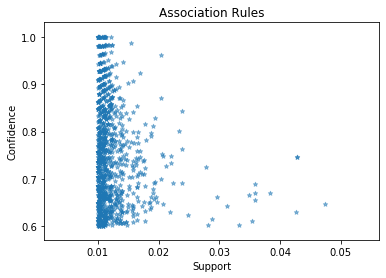

In [58]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

Text(0.5, 1.0, 'Confidence')

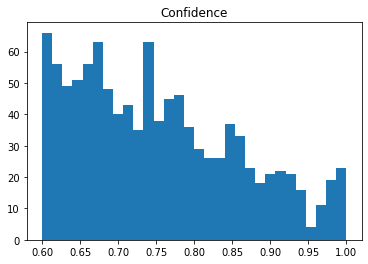

In [59]:
rules.hist("confidence", grid=False, bins=30)
plt.title("Confidence")

Text(0.5, 1.0, 'Lift')

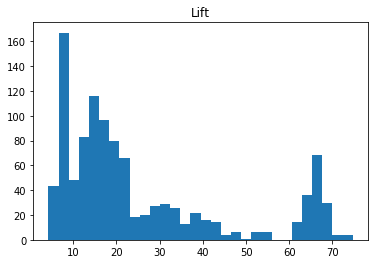

In [60]:
rules.hist("lift", grid=False, bins=30)
plt.title("Lift")

Text(0.5, 1.0, 'Leverage')

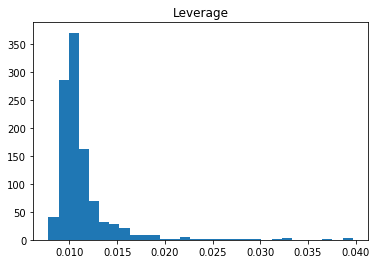

In [61]:
rules.hist("leverage", grid=False, bins=30)
plt.title("Leverage")

Text(0.5, 1.0, 'Conviction')

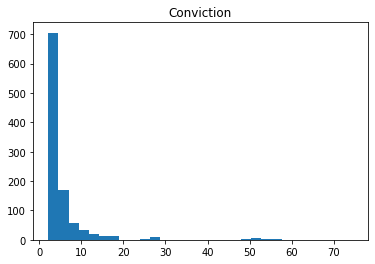

In [62]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.title("Conviction")

In [ ]:
# Exercise 8.07 Unit Test

def unittest_exercise_8_07(df1, df2):
    dfs = {"df1":[df1, 1064, (2.15, 74.51)], 
           "df2":[df2, 170, (2.35, 57.18)]}
    
    for k,v in dfs.items():
        
        df_shape = v[0].shape[0]
        assert df_shape == v[1], "Dimension mismatch"
    
        vals = v[0][numpy.isfinite(v[0]['conviction'])].conviction.values
        vmin = round(numpy.min(vals), 2)
        vmax = round(numpy.max(vals), 2)
        assert (vmin, vmax) == v[2], "Conviction incorrect"

unittest_exercise_8_07(df1=rules, df2=rules2)